## Import tensorflow, keras modules

In [2]:
#from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds  # For loading datasets
import numpy as np
import matplotlib.pyplot as plt     # For plotting images
import cv2                          # For resizing images
from keras import Model

print(tf.version.VERSION)
print(tf.keras.__version__)

ModuleNotFoundError: No module named 'tensorflow'

## Import  MNIST Dataset

In [ ]:
mnist = tf.keras.datasets.mnist
# More dataset choices here: https://www.tensorflow.org/api_docs/python/tf/keras/datasets
# input image dimensions
img_x, img_y, img_z = 28, 28, 1

In [ ]:
# Load training data, labels; and testing data and their true labels
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
# because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3
train_images = train_images.reshape(train_images.shape[0], img_x, img_y, 1)
test_images  = test_images.reshape(test_images.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, img_z)

# Normalize input between 0 and 1
# Very important
train_images = train_images / 255.0
test_images = test_images / 255.0

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
# Check shapes of train_images, train_labels etc
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


### Visualize the dataset

In [ ]:
# For printing, we name each of the 10 classes below
class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(img_x, img_y), cmap=plt.cm.binary)
    #print(train_labels[i][0])
    plt.xlabel(class_names[train_labels[i]])

## Create and train Lenet-5 Using Keras API on MNIST dataset **[3 points]**

In [ ]:
'''
Create a NN with 1 input layer
1 conv2D layer, 6 filters, 5x5 filter size, stride = (1, 1), activation tanh, use padding='same' argument (check it on https://keras.io/api/layers/convolution_layers/convolution2d/ )
1 AveragePooling2D layer (use default arguments in https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D )
1 conv2D layer, 16 Filters, 5x5 filter size, stride = (1, 1), activation tanh, padding='valid'
1 AveragePooling2D layer (Default arguements)
1 conv2D layer, 120 filters, 5x5 filter size, stride = (1, 1), activation tanh, padding='valid'
Flatten layer
1 Dense layer, 84 units, tanh activation
1 output layer
'''
input_shape = train_images[0].shape
model = tf.keras.Sequential()
#1st: 1 conv2D layer, 6 filters, 5x5 filter size, stride = (1, 1), activation tanh, use padding='same' argument
model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1),
                 activation='tanh', padding='same',
                 input_shape=input_shape))
#2nd: 1 AveragePooling2D layer (use default arguments in https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D )
model.add(layers.AveragePooling2D(
    pool_size=(2, 2),
    strides=None,
    padding='valid',
    data_format=None))
#3rd: 1 conv2D layer, 16 Filters, 5x5 filter size, stride = (1, 1), activation tanh, padding='valid'
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1),
                 activation='tanh', padding='valid'))
#4th: 1 AveragePooling2D layer (Default arguements)
model.add(layers.AveragePooling2D(
    pool_size=(2, 2),
    strides=None,
    padding='valid',
    data_format=None))
#5th: 1 conv2D layer, 120 filters, 5x5 filter size, stride = (1, 1), activation tanh, padding='valid'
model.add(layers.Conv2D(filters=120, kernel_size=(5, 5), strides=(1, 1),
                 activation='tanh', padding='valid'))
#6th: Flatten layer
model.add(layers.Flatten())
#7th: 1 Dense layer, 84 units, tanh activation
model.add(layers.Dense(84, activation='tanh'))
#8th: 1 output layer
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Compile the model with appropriate Loss function
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model on MNIST dataset
epochs = 3
batch_size = 500
model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs)

Epoch 1/3
120/120 [==============================] - 11s 6ms/step - loss: 0.5864 - accuracy: 0.8399
Epoch 2/3
120/120 [==============================] - 1s 5ms/step - loss: 0.2273 - accuracy: 0.9315
Epoch 3/3
120/120 [==============================] - 1s 6ms/step - loss: 0.1569 - accuracy: 0.9521


##(b) Check Accuracy on Test Data **[0.5 point]**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.1312 - accuracy: 0.9610


In [ ]:
# Try to get 90% or more accuracy
print('Test accuracy:', test_acc)

Test accuracy: 0.9610000252723694


### Visualize predictions on test data

In [ ]:
# Get all predictions for test data
predictions = model.predict(test_images)

In [ ]:
# Code to visualize predictions
# Incorrect predictions are highlighted in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)

##(c) Download binary_alpha_digits dataset using tfds, split dataset **[1 point]**

In [ ]:
## write your code here
dataset_name = "binary_alpha_digits"

ds_images, ds_labels = tfds.as_numpy(tfds.load(
    dataset_name,
    split='all',
    batch_size=-1,
    as_supervised=True,
))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1404 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/binary_alpha_digits/1.0.0.incompleteD5I2BV/binary_alpha_digits-train.tfrec…

Dataset binary_alpha_digits downloaded and prepared to /root/tensorflow_datasets/binary_alpha_digits/1.0.0. Subsequent calls will reuse this data.


In [ ]:
## Split dataset into 20% testing and 80% training

test_size = 0.2   # fraction of test data

stop = int(0.8 * len(ds_labels))

train_images = ds_images[:stop]
train_labels = ds_labels[:stop]
test_images = ds_images[stop:]
test_labels = ds_labels[stop:]

# Check training, testing data size
print(train_images.shape)
print(test_images.shape)

(1123, 20, 16, 1)
(281, 20, 16, 1)


### Visualize data

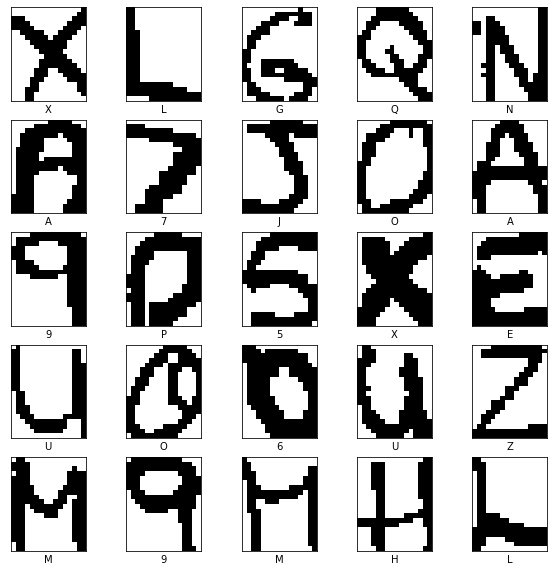

In [ ]:
# Code to visualize predictions
# Incorrect predictions are highlighted in red
import matplotlib.pyplot as plt
%matplotlib inline
class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(20, 16), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## (d) Upscale training, testing data to MNIST image size (28, 28, 1) **[2 points]**

In [ ]:
'Upscale Data'
newSize = 28

# create a numpy array for storing upscaled training images
train_upscale = np.zeros((train_images.shape[0], newSize, newSize, 1))
dsize = (newSize, newSize)
for i in range(len(train_images)):
  new_img = cv2.resize(train_images[i], dsize)
  train_upscale[i] = new_img.reshape(28,28,1)
print(train_upscale.shape)

# create a numpy array for storing upscaled testing images
test_upscale = np.zeros((test_images.shape[0], newSize, newSize, 1))
for i in range(len(test_images)):
  new_img = cv2.resize(test_images[i], dsize)
  test_upscale[i] = new_img.reshape(28,28,1)
print(test_upscale.shape)

(1123, 28, 28, 1)
(281, 28, 28, 1)


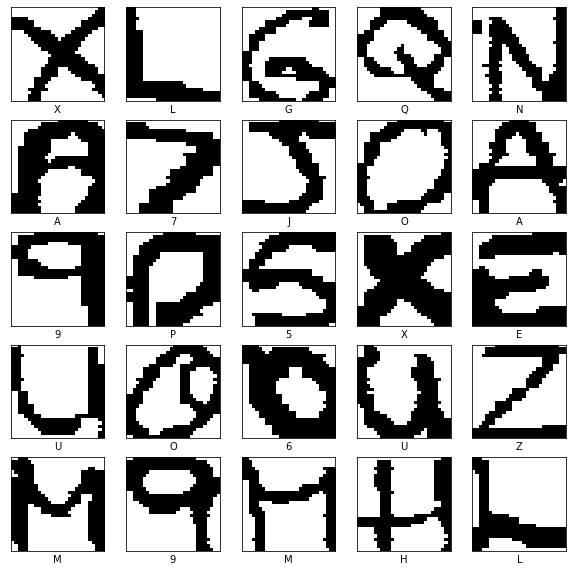

In [ ]:
%matplotlib inline
# Visualize upscaled images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_upscale[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

##(e) Transfer learning-- Remove Last layer from your trained LeNet **[0.5 points]**



In [ ]:
## You can decide whether to train the whole network again or fix layer weights from the MNIST-trained network
## Check link: https://keras.io/getting_started/faq/#how-can-i-freeze-keras-layers 
for i in range(5):
    model.layers[i].trainable = False
for i in range(5,8):
    model.layers[i].trainable = True

## Code for removing last layer
# Get a reference to the model's layers

# Create a new model with all layers except the last one
new_model = tf.keras.Sequential(model.layers[:-1])
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)              

##(f) Transfer learning-- Add new layers to LeNet **[1.5 points]**


In [ ]:
## Add one or more hidden layer
## Add output layer

# Reshape for CNN
new_model.add(layers.Dense(784, activation='relu'))
new_model.add(layers.Reshape((28,28,1)))

# Conv 2D Filter
new_model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1),
                 activation='tanh', padding='valid',
                 input_shape=input_shape))

# #AveragePooling2D layer 
new_model.add(layers.AveragePooling2D(
    pool_size=(2, 2),
    strides=None,
    padding='valid',
    data_format=None))

# Flatten
new_model.add(layers.Flatten())

#Dense layer, 84 units
new_model.add(layers.Dense(84, activation='tanh'))

#Output layer, 36 units
new_model.add(layers.Dense(36, activation='softmax'))

In [ ]:
# Compile the model with appropriate Loss function
new_model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##(g) Train the model and show accuracy on the testing dataset (test_upscale) **[1.5 point]**

In [ ]:
## Your code here
new_model.fit(train_upscale, train_labels, epochs=12, batch_size=16) 

Epoch 1/12
71/71 [==============================] - 2s 6ms/step - loss: 2.9251 - accuracy: 0.1977
Epoch 2/12
71/71 [==============================] - 0s 4ms/step - loss: 1.9755 - accuracy: 0.4274
Epoch 3/12
71/71 [==============================] - 0s 4ms/step - loss: 1.5172 - accuracy: 0.5307
Epoch 4/12
71/71 [==============================] - 0s 4ms/step - loss: 1.2096 - accuracy: 0.6402
Epoch 5/12
71/71 [==============================] - 0s 4ms/step - loss: 0.9913 - accuracy: 0.6981
Epoch 6/12
71/71 [==============================] - 0s 4ms/step - loss: 0.8294 - accuracy: 0.7489
Epoch 7/12
71/71 [==============================] - 0s 4ms/step - loss: 0.6748 - accuracy: 0.7907
Epoch 8/12
71/71 [==============================] - 0s 4ms/step - loss: 0.5600 - accuracy: 0.8264
Epoch 9/12
71/71 [==============================] - 0s 4ms/step - loss: 0.4508 - accuracy: 0.8664
Epoch 10/12
71/71 [==============================] - 0s 4ms/step - loss: 0.3886 - accuracy: 0.8807
Epoch 11/12
71/71 [

In [ ]:
test_loss, test_acc = new_model.evaluate(test_upscale, test_labels)
print('Overall accuracy:', test_acc)

9/9 [==============================] - 0s 11ms/step - loss: 1.3788 - accuracy: 0.5765
Overall accuracy: 0.5765124559402466
